In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

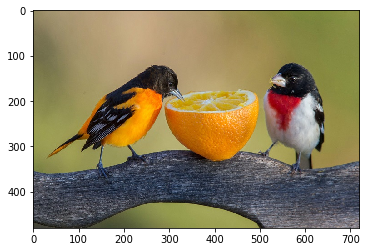

In [15]:
from skimage.io import imread

image = imread('some_birds.jpg')
plt.imshow(image)

In [16]:
from skimage import img_as_float

image_float = img_as_float(image)
print(image_float.shape)
image_float[:1]

(480, 720, 3)


array([[[0.56470588, 0.52941176, 0.36862745],
        [0.56470588, 0.52941176, 0.36862745],
        [0.56470588, 0.52941176, 0.36862745],
        ...,
        [0.54117647, 0.56862745, 0.26666667],
        [0.54117647, 0.56862745, 0.26666667],
        [0.54117647, 0.56862745, 0.26666667]]])

In [17]:
X = image_float.reshape((-1, 3))
print(X.shape)
X[:2]

(345600, 3)


array([[0.56470588, 0.52941176, 0.36862745],
       [0.56470588, 0.52941176, 0.36862745]])

### Peak signal-to-noise ratio (PSNR)
Let's find at which **number of clusters** an PSNR metric will be **greater** than chosen `threshold`.

Peak signal-to-noise ratio, often abbreviated **PSNR**, is an engineering term for the ratio between the maximum possible power of a signal and the power of corrupting noise that affects the fidelity of its representation. Because many signals have a very wide dynamic range, PSNR is usually expressed in terms of the logarithmic decibel scale.

In [35]:
from sklearn.cluster import KMeans

psnr_threshold = 25

In [36]:
%%time

x_max = X.max()
psnr_max = 0
for num_clusters in range(2, 21):
    clf = KMeans(n_clusters=num_clusters,
                 init='k-means++',
                 random_state=11)
    clf.fit(X)
    
    # Replace all pixels with median and mean values for each cluster found:
    labels = clf.labels_    # array([4, 4, 4, ..., 0, 0, 0])
    X_median = np.zeros(X.shape)
    X_mean = np.zeros(X.shape)
    for cluster in np.unique(labels):
        # Find indicies of the class/cluster.
        indices = np.where(labels == cluster)
        # Replace values of the cluster with median/mean for each column.
        X_median[indices] = np.median(X[indices], axis=0)
        X_mean[indices] = np.mean(X[indices], axis=0)
    
    # Compute PSNR:        
    mean_squared_error = (np.square(X - X_median)).mean()
    psnr_median = 10 * np.log10(x_max**2 / mean_squared_error)
    mean_squared_error = (np.square(X - X_mean)).mean()
    psnr_mean = 10 * np.log10(x_max**2 / mean_squared_error)
    if max(psnr_median, psnr_mean) > psnr_threshold:
        print('Values are replaced by:', 'median' if psnr_median > psnr_mean else 'mean')
        print('Minimum clusters required for PSNR > {} : {}'.format(psnr_threshold, num_clusters))
        break

Values are replaced by: mean
Minimum clusters required for PSNR > 25 : 8
Wall time: 35.9 s


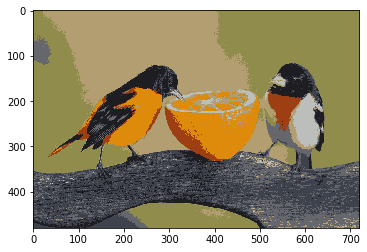

In [37]:
plt.imshow(X_mean.reshape(image_float.shape))